In [4]:
#EDA for Data Analysis and Machine Learning 
# Auther Nawab khan 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stat as st


In [5]:
data = pd.read_csv(r"C:\Users\PMLS\Downloads\iris_data.csv")
data.tail(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
data.shape

(150, 5)

In [9]:
data.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [31]:
print(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [35]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [37]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [67]:
data['species'] = data.species.str.replace('Iris-', '')
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [119]:
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
print(stats_df)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
range      3.600000     2.400000      5.900000     2.400000


In [161]:
out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%':'Meadian'}, inplace=True)
print(stats_df)


KeyError: "['50%'] not in index"

In [171]:
out_fields = ['mean','25%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'25%':'smal_quartial'})

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
smal_quartial,5.100000,2.800,1.600000,0.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [175]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [212]:
mean_1 = data.groupby('species').mean()
mean_1.round()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.0,1.0,0.0
versicolor,6.0,3.0,4.0,1.0
virginica,7.0,3.0,6.0,2.0


In [11]:
x = data.groupby('species').median()
x.round()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.0,2.0,0.0
versicolor,6.0,3.0,4.0,1.0
virginica,6.0,3.0,6.0,2.0


C:\Users\PMLS\AppData\Local\Temp\ipykernel_70632\216187628.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: ylabel='Density'>

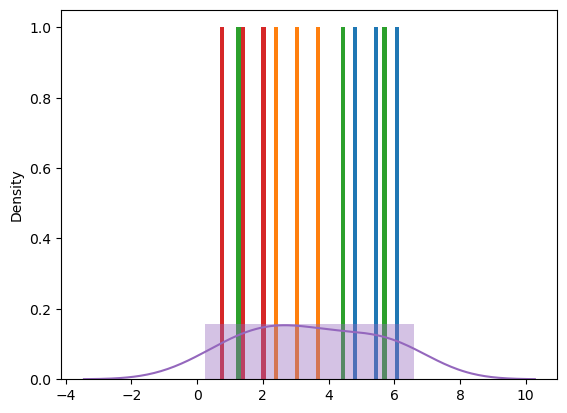

In [34]:
x = data.groupby('species').median()
x = data.groupby('species').mean()
plt.hist(x)
sns.distplot(x)

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

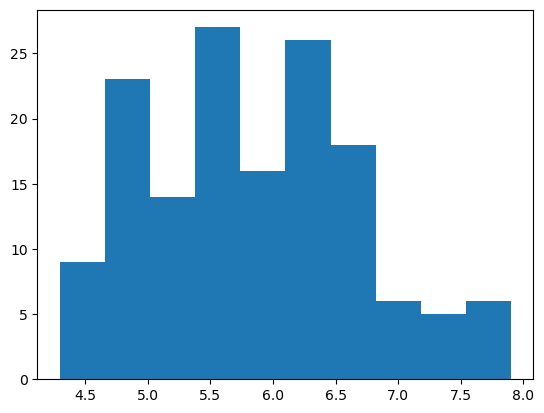

In [27]:
plt.hist(data['sepal_length'])

C:\Users\PMLS\AppData\Local\Temp\ipykernel_70632\148179261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sepal_width'])


<Axes: xlabel='sepal_width', ylabel='Density'>

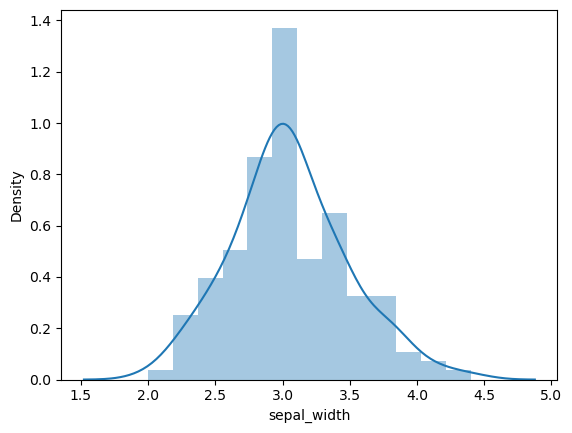

In [25]:
sns.distplot(data['sepal_width'])

C:\Users\PMLS\AppData\Local\Temp\ipykernel_70632\3309806119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sepal_length'])


<Axes: xlabel='sepal_length', ylabel='Density'>

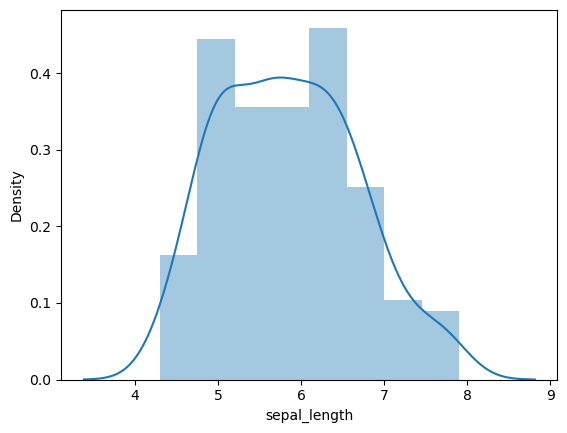

In [39]:
sns.distplot(data['sepal_length'])

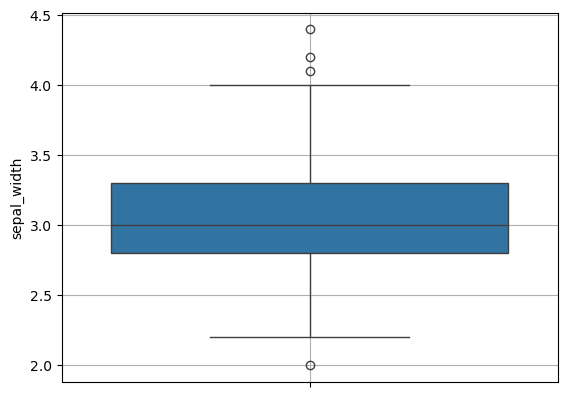

In [115]:
sns.boxplot(y=data['sepal_width'])
plt.grid()


In [109]:
data.sort_values(by='sepal_width',ascending=True)[:1]
data.replace(by='sepal_width'

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor


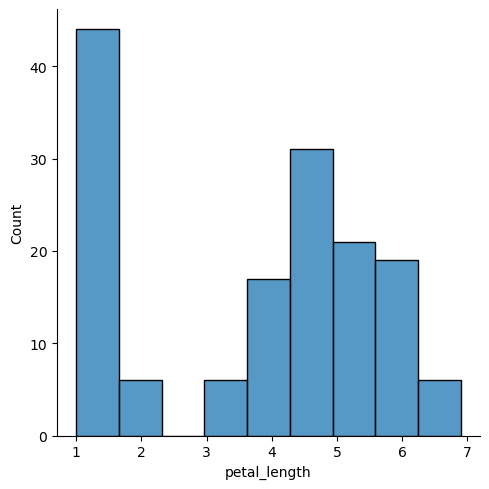

In [71]:
sns.displot(data['petal_length'])

In [119]:
#outliers_dropped = data.replace(by='sepal_width'.index[[60]]).mean()

TypeError: 'builtin_function_or_method' object is not subscriptable

In [135]:
from pprint import pprint
agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['sepal_length'] = 'max'
agg_dict['sepal_width'] = 'max'
agg_dict['petal_length'] = 'max'
agg_dict['petal_width'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': 'max',
 'sepal_length': 'max',
 'sepal_width': 'max'}


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


{'whiskers': [<matplotlib.lines.Line2D at 0x196cbe0a2a0>,
 'caps': [<matplotlib.lines.Line2D at 0x196cbe0a840>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c68eabd0>],
 'medians': [<matplotlib.lines.Line2D at 0x196cbe0acc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196cbe0aff0>],
 'means': []}

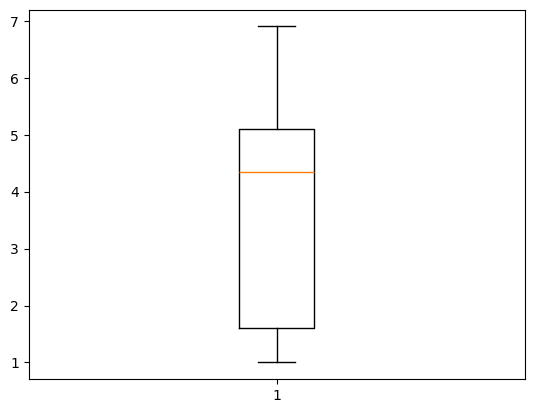

In [139]:
plt.boxplot(data['petal_length'])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

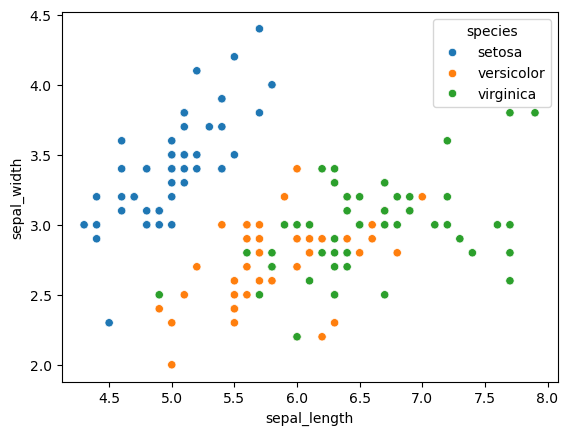

In [157]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue="species", data=data)

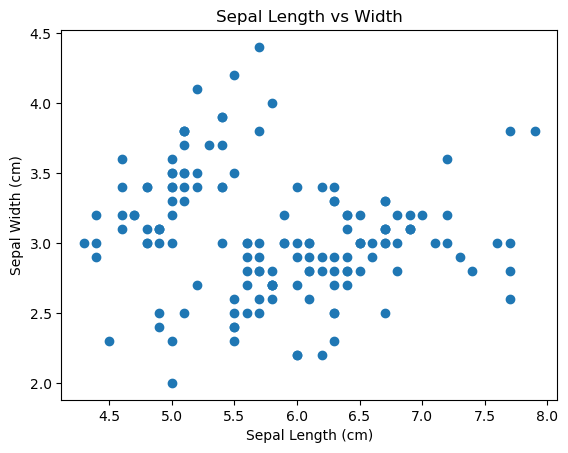

In [143]:
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');
### END SOLUTION

<Axes: xlabel='petal_length', ylabel='petal_width'>

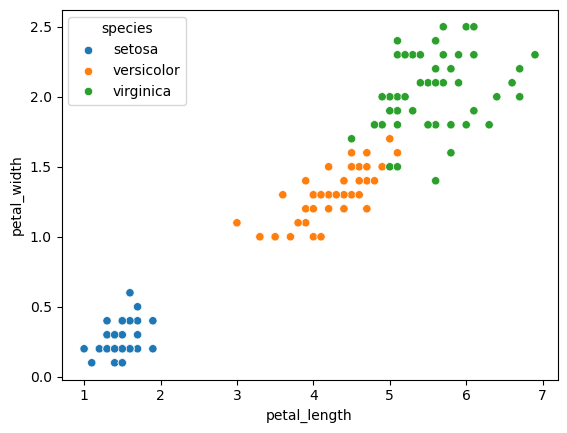

In [159]:
sns.scatterplot(x='petal_length',y='petal_width',hue="species", data=data)

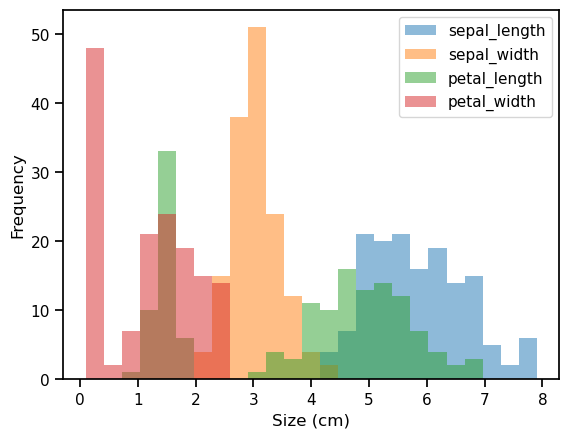

In [161]:
import seaborn as sns
sns.set_context('notebook')
### BEGIN SOLUTION
# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

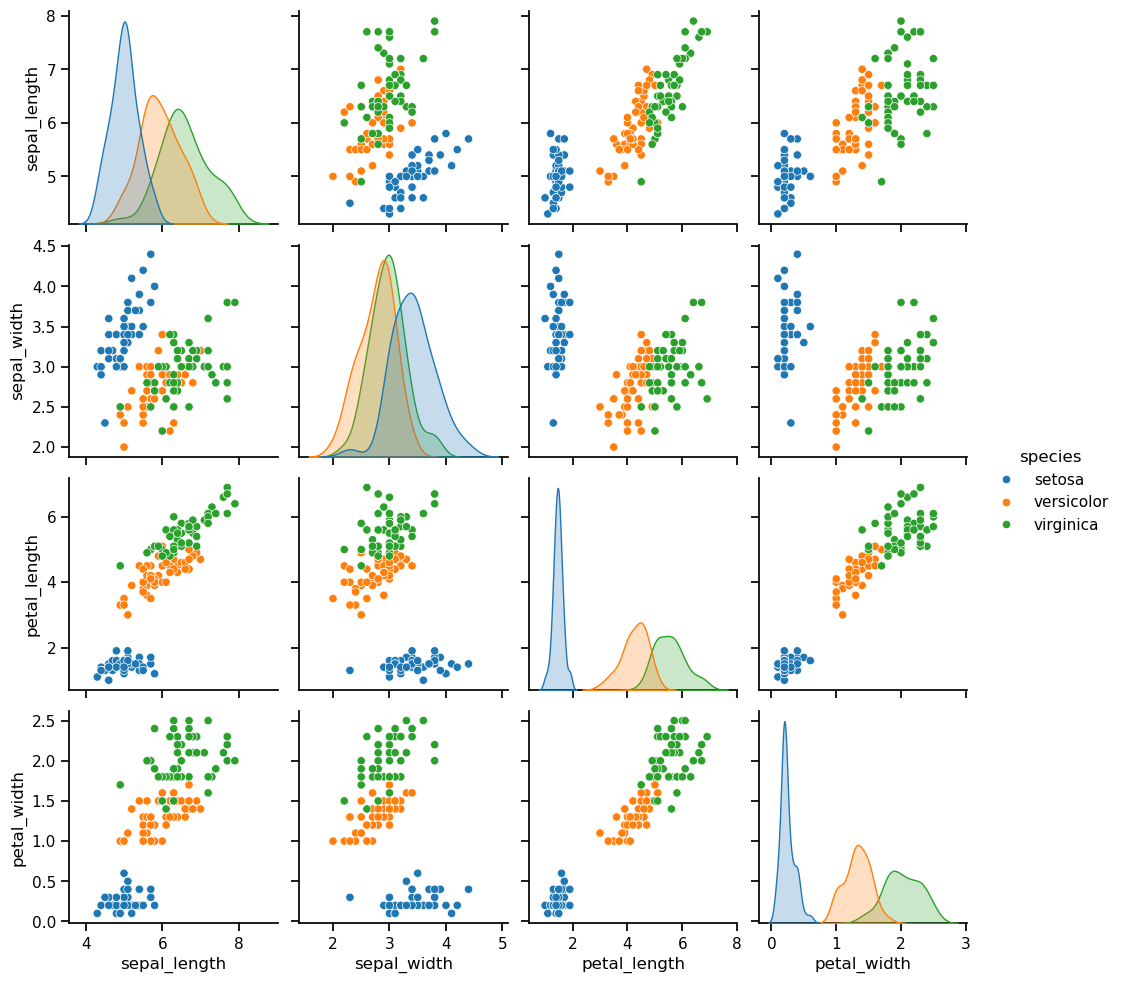

In [165]:
sns.pairplot(data,hue="species")

In [20]:
cor = data[['petal_length','petal_width']].corr()
print(cor)

              petal_length  petal_width
petal_length      1.000000     0.962757
petal_width       0.962757     1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x268999f1a60>,
 'caps': [<matplotlib.lines.Line2D at 0x268999f2000>,
 'boxes': [<matplotlib.lines.Line2D at 0x268999f1760>],
 'medians': [<matplotlib.lines.Line2D at 0x268999f24e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x268999f27e0>],
 'means': []}

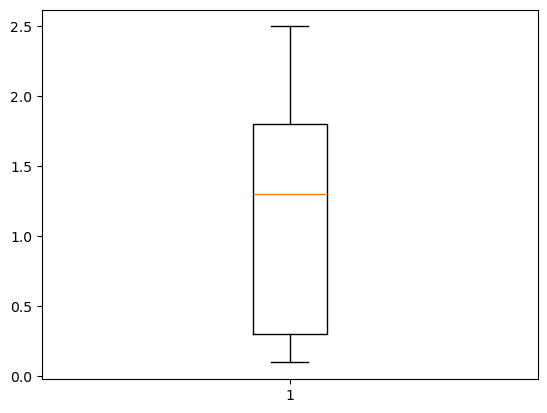

In [22]:
plt.boxplot(['petal_width'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2689e286930>,
 'caps': [<matplotlib.lines.Line2D at 0x2689e286f00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2689e2866c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2689e287410>],
 'fliers': [<matplotlib.lines.Line2D at 0x2689e287710>],
 'means': []}

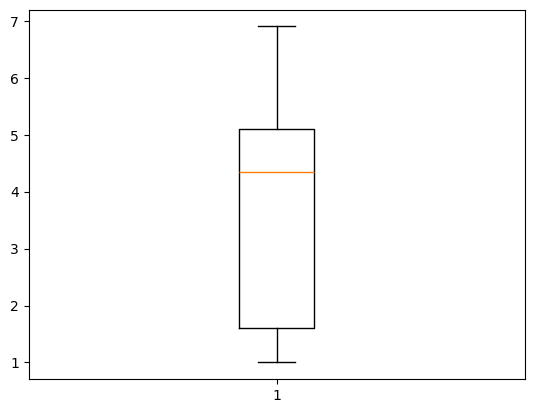

In [26]:
plt.boxplot(data['petal_length'])

<Axes: xlabel='sepal_length', ylabel='Count'>

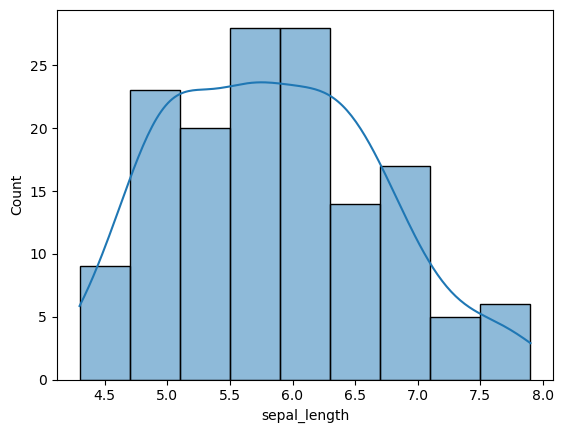

In [42]:
sns.histplot(data['sepal_length'],kde=True)